# PyVADesign Tutorial

Welcome to the PyVADesign tutorial! 

In this notebook, we will explore the process of designing dsDNA fragments and corresponding primers for a number of selected mutations.

## Tutorial Overview

In this tutorial, we will:

1. Import required modules and packages
2. Load the vector sequence and the Gene of Interest
3. Parse user input mutations
4. Design dsDNA fragments and visualize the fragment regions
5. Design primers that prepare the target plasmid for insertion of the dsDNA fragment as well as sequencing primers using Primer3

Let's get started with the first step: importing the required modules and packages.

### 1. Import required modules and packages

In [23]:
import os
from Bio import SeqIO

from src.mutation import Mutation
from src.sequence import Vector, Gene
from src.dna_blocks import DNABlockDesign
from src.primer import DesignPrimers
from src.plot import Plot

%reload_ext autoreload
%autoreload 2

### 2. Load the vector sequence and the Gene of Interest

To successfully run the design process, the gene of interest must be provided in FASTA format and the plasmid sequence should be available in either DNA (.dna) or GenBank (.gb) format

For the purpose of this tutorial we will focus on Mycobacterial membrane protein Large 3 (MmpL3) of *Mycobacterium avium*. MmpL3 is a lipid transporter that has become a promising drug target for developing new anti-mycobacterial therapies. 

In [24]:
# Create a gene object and parse the gene sequence from the data directory

sequence_file = os.path.join('tutorial-data', '01_base-tutorial', 'A0A0H2ZYQ2.fasta')  # Gene sequence in fasta format
gene_instance = Gene(stopcodon=False)
gene_instance.parse_sequence(sequence_file)

# Show the gene sequence
print(len(gene_instance.sequence), gene_instance.sequence)

2274 atgAGTtaTcggtatcggtacatcgtgatcggggtcacggtagctctgtgcctgctcggcggcgttttcggcatcagcctgggcaagcacgtcacccagagcggcttctacgacgacgccagccagtccgtcaaggcgtcggtgctcggcgaccagacctacggccgcgaccgcaccagccacgtggtggccaccttcacgacgcccgacgggaaaaccgtcgacgacgcgggctggcgggacaaggtcgtcgccgagctgaacaagttcaaagccgaccaccccgaccaggtcgtcgggtgggccggctggctggcggcgccggacagcaccaacccggtgatcaagggcatggtcagcgaggacaagaagcacaccttcgtgtccatcccgctcaagggcgacgacgacgacaccatcctgaacaactacaaggccatcgccccggatatgcagaagctcaacggcggcgccgtgcagctcgctgggctggagccgatcgccaacgcgctgaccgggaccatcgccaccgaccagcgccgcatggaggtcctcgcggtgccgatggtggcggtggtgctgttcctggtgttcggcggcgcggtcgccgccggcctaccggccatcgtgggcggtctgagcatcgccggctcgctgggcatcctgcggctggtcgccgtgttcgggccggtgcactacttcgcccagccggtggtgtcgctgatcggcctgggcatcgcgatcgactacgggcttttcgtggtgagccggttccgggaggagatcgccgagggctacgacaccgaggccgcggtgcgaagaaccgtgatgacggccgggcgcacagtgacgttctcggccgtgctgatcatcgcgtcgagcgccagcctgctggtgttgccgcagggcttcgtgcactcactgacctacgccatcttcgccgcggtgggcctggccgcgctgctgtcgatcacgttcctgccggcctgcctggg

In [25]:
# Create a plasmid object and parse the input plasmid from the data directory

vector_file = os.path.join('tutorial-data', '01_base-tutorial', 'pACE_mmpL3-Mav.dna')  # Vector sequence including MmpL3 in dna format
vector_instance = Vector(gene=gene_instance)
vector_instance.parse_vector(vector_file)

# Show the vector sequence
print(vector_instance.vector.seq)

ttgagatcctttttttctgcgcgtaatctgctgcttgcaaacaaaaaaaccaccgctaccagcggtggtttgtttgccggatcaagagctaccaactctttttccgaaggtaactggcttcagcagagcgcagataccaaatactgtccttctagtgtagccgtagttaggccaccacttcaagaactctgtagcaccgcctacatacctcgctctgctaatcctgttaccagtggctgctgccagtggcgataagtcgtgtcttaccgggttggactcaagacgatagttaccggataaggcgcagcggtcgggctgaacggggggttcgtgcacacagcccagcttggagcgaacgacctacaccgaactgagatacctacagcgtgagctatgagaaagcgccacgcttcccgaggggagaaaggcggacaggtatccggtaagcggcagggtcggaacaggagagcgcacgagggagcttccagggggaaacgcctggtatctttatagtcctgtcgggtttcgccacctctgacttgagcgtcgatttttgtgatgctcgtcaggggggcggagcctatggaaaaacgccagcaacgcggcctttttacggttcctggccttttgctggccttttgctcacatgttctttcctgcgttatcccctgattctgtggataaccgtattaccgcctttgagtgagctgataccgctcgccgcagccgaacgaccgagcgcaacgcgtgcggccgcacgcgtgagcccaccagctccgtaagttcgggcgctgtgtggctcgtacccgcgcattcaggcggcagggggtctaacgggtctaaggcggcgtgtacggccgccacagcggctctcagcggcccggaaacgtcctcgaaacgacgcatgtgttcctcctggttggtacaggtggttgggggtgctcggctgtcgctggtgttccaccaccagggctcgacgggagagcgggggagtgtgcag

### 3. Parse user input mutations

The desired mutations should be listed in a text file.

Here, we create a Mutation() object and parse the desired mutations. 

In [26]:
mutations_file = os.path.join('tutorial-data','01_base-tutorial', 'mutations.txt')  # text file containing mutations

# Show file contents
print("File contents:")
with open(mutations_file) as f:
    print(f.read())

File contents:
Q152K
D555I
W609I
H558N
N458F
G573M
T506P
V409R
G511C
Combined Q160K-P207P-V202D-L194Y-M182D
Combined G519R-A527Y-G548V-N537L-I530T
Combined V187A-A208C-G205S-S218S-L206D
Combined N472Y-G479L-R514W
Combined P95S-L141N-N142H-V128V-Y144C
Combined M684N-K729I-S692M
Combined L425D-F442S-V453D-T447D-R471R
Insert L533-WCCWM
Insert M151-TYWFMHNV
Insert V586-VNNGAV
Insert P411-SASAY
Insert L241-RG
Deletion W741-N747
Deletion A366-E376
Deletion L433-Q435


In [27]:
# Create a Mutation object and parse the input mutations from the file

mutation_instance = Mutation()
mutation_instance.parse_mutations(mutations_file)

# Print the mutations that were parsed

mutation_instance.print_mutations()

The selected mutations are:
	Combined  	P95S, L141N, N142H, V128V, Y144C
	Insert    	M151-TYWFMHNV
	Mutation  	Q152K     
	Combined  	Q160K, P207P, V202D, L194Y, M182D
	Combined  	V187A, A208C, G205S, S218S, L206D
	Insert    	L241-RG   
	Deletion  	A366-E376 
	Mutation  	V409R     
	Insert    	P411-SASAY
	Combined  	L425D, F442S, V453D, T447D, R471R
	Deletion  	L433-Q435 
	Mutation  	N458F     
	Combined  	N472Y, G479L, R514W
	Mutation  	T506P     
	Mutation  	G511C     
	Combined  	G519R, A527Y, G548V, N537L, I530T
	Insert    	L533-WCCWM
	Mutation  	D555I     
	Mutation  	H558N     
	Mutation  	G573M     
	Insert    	V586-VNNGAV
	Mutation  	W609I     
	Combined  	M684N, K729I, S692M
	Deletion  	W741-N747 


In [28]:
# count number of mutations per type

num_point_mutations = [i.type == 'Mutation' for i in mutation_instance.mutations].count(True)
print(f'Number of point mutations: {num_point_mutations}')
num_double_mutations = [i.type == 'Combined' for i in mutation_instance.mutations].count(True)
print(f'Number of double mutations: {num_double_mutations}')
num_insert = [i.type == 'Insert' for i in mutation_instance.mutations].count(True)
print(f'Number of insertions: {num_insert}')
num_deletion = [i.type == 'Deletion' for i in mutation_instance.mutations].count(True)
print(f'Number of deletions: {num_deletion}')
print('-----------------------------------')
total_mutations = num_point_mutations + num_double_mutations + num_insert + num_deletion
print(f'Total number of mutations: {total_mutations}')

Number of point mutations: 9
Number of double mutations: 7
Number of insertions: 5
Number of deletions: 3
-----------------------------------
Total number of mutations: 24


### 4. Design dsDNA fragments and visualize the fragment regions

Next, we create an instance of DNABlockDesign that can initiate the design of the dsDNA fragments. 
<br>
<br>
For the design instance to run we need to provide the parsed mutations, the vector and gene, and optionally the settings.
We choose as optimization method amount_optimization that aims to use as little fragment regions as possible. Another option would be to do cost_optimization, that aims to use as few bp as possible, which usually leads to a higher number of different fragment regions
<br>


In [31]:
# we use a settingsfile that contains input parameters for the design class, such as the minimum and maximum length of the dsDNA fragments

settingsfile = os.path.join('tutorial-data', '01_base-tutorial', 'dsDNA-Design-settings-AmountOpt.txt')

# Create an DNABlockDesign object based on the input mutations and the gene sequence

design_instance = DNABlockDesign(mutation_instance=mutation_instance,
                                 vector_instance=vector_instance,
                                 gene_instance=gene_instance,
                                 settings_file=settingsfile,
                                 output_dir='tutorial-data/01_base-tutorial/tutorial-output/amount-optimization')

Now we can run the design method to generate the dsDNA fragments

In [39]:
design_instance.run_design_DNABlocks()

Settings for DNABlockDesign:
		output_dir           : tutorial-data/01_base-tutorial/tutorial-output/amount-optimization
		settings_file        : tutorial-data\01_base-tutorial\dsDNA-Design-settings-AmountOpt.txt
		cost_optimization    : False
		amount_optimization  : True
		clone_files          : True
		verbose              : True
		codon_usage          : U00096
		bp_price             : 0.05
		max_DNABlock_length  : 1500
		min_DNABlock_length  : 300
		min_overlap          : 15
		min_order            : 24
		cost                 : 2585.4
		silent_mutations     : True
		silent_mutation_index: 30
		tm_overlap           : 50


Loading relative codon frequencies from file
Clustering mutations on gene of interest using K-medioids clustering
Optimizing based on number of fragment regions
Starting dsDNA fragment design
RV: len=15 Tm=50.00 Seq=aaagccgaccacccc
FV: len=15 Tm=50.00 Seq=ctgggcatcgcgatc
RV: len=15 Tm=50.00 Seq=ctcaactggctggcc
FV: len=15 Tm=50.00 Seq=aagatcgggctgggc
Block 1 5600 6074

SystemExit: 

c:\Users\Rosan\Anaconda3\envs\PyVADesign\lib\site-packages\IPython\core\interactiveshell.py:3406: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


Visualize the fragment regions on the Gene of Interest

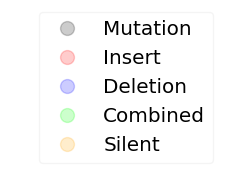

In [12]:
# Now that we have designed the eblocks, we can visualize them using the Plot class

plot_instance = Plot(DNABlocks_design_instance=design_instance,
                     output_dir=design_instance.output_dir,
                     gene_instance=gene_instance,
                     mutation_instance=mutation_instance,
                     vector_instance=vector_instance,
                     show=True)

plot_instance.plot_mutation_legend()

From this plot we can see that two regions are defined with multiple mutations in each region. The mutations are colored by their type. The Silent mutations in the beginning and end of every fragment region are the silent mutation that can be used to sequence the clone

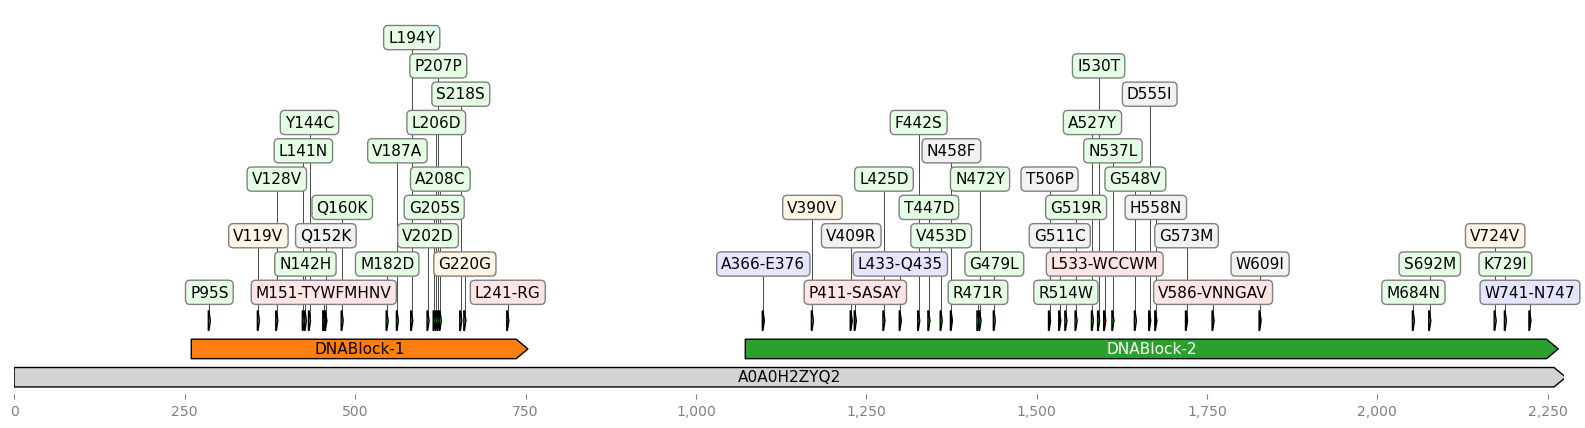

In [13]:
plot_instance.plot_DNABlocks_mutations(figure_length=20,
                                       figure_width=5)

Let's now check the effect that the optimization method has on the design of the dsDNA fragments by changing from amount optimization to cost optimization

In [44]:
settingsfile_cost = os.path.join('tutorial-data', '01_base-tutorial', 'dsDNA-Design-settings-CostOpt.txt')

design_instance_cost = DNABlockDesign(mutation_instance=mutation_instance,
                                      vector_instance=vector_instance,
                                      gene_instance=gene_instance,
                                      settings_file=settingsfile_cost,
                                      output_dir='tutorial-data/01_base-tutorial/tutorial-output/amount-optimization')

design_instance_cost.run_design_DNABlocks()

plot_instance = Plot(DNABlocks_design_instance=design_instance_cost,
                     output_dir=design_instance_cost.output_dir,
                     gene_instance=gene_instance,
                     mutation_instance=mutation_instance,
                     vector_instance=vector_instance,
                     show=True)

plot_instance.plot_DNABlocks_mutations(figure_length=20,
                                       figure_width=5)

Settings for DNABlockDesign:
		output_dir           : tutorial-data/01_base-tutorial/tutorial-output/amount-optimization
		settings_file        : tutorial-data\01_base-tutorial\dsDNA-Design-settings-CostOpt.txt
		cost_optimization    : True
		amount_optimization  : False
		clone_files          : True
		verbose              : True
		codon_usage          : U00096
		bp_price             : 0.05
		max_DNABlock_length  : 1500
		min_DNABlock_length  : 300
		min_overlap          : 15
		min_order            : 24
		cost                 : -1
		silent_mutations     : True
		silent_mutation_index: 30
		min_tm_overlap       : 47
		max_tm_overlap       : 52


Loading relative codon frequencies from file
Clustering mutations on gene of interest using K-medioids clustering
Optimizing based on price per bp
Starting dsDNA fragment design
270 744
RV: len=15 Tm=50.00 Seq=aaagccgaccacccc
FV: len=15 Tm=50.00 Seq=ctgggcatcgcgatc
Adjusted bins: 270 744
1083 1842
RV: len=15 Tm=50.00 Seq=ctcaactggctggcc
FV: len=

SystemExit: 

c:\Users\Rosan\Anaconda3\envs\PyVADesign\lib\site-packages\IPython\core\interactiveshell.py:3406: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


Using the cost optmization setting, three different fragment regions are created, thus increasing the number of PCR reactions that need to be performed to insert the different dsDNA fragments in the different fragment regions

In [15]:
# Lets check the cost difference between the different optmization methods

bp_price = design_instance.bp_price
print(f'Price per bp: {bp_price}')

# Costs amount optmization

price_amount_opt = design_instance.cost
print(f'Total cost amount optimization: {price_amount_opt}')

price_cost_opt = design_instance_cost.cost
print(f'Total cost cost optimization: {price_cost_opt}')

Price per bp: 0.05
Total cost amount optimization: 2641.4
Total cost cost optimization: 1796.85


### 5. Design primers that prepare the target plasmid for insertion of the dsDNA fragment as well as sequencing primers using Primer3

The primers are designed using the Primer3 package

In [16]:
# Create a primer design object and run the primer design process for IVA primers to prepare the plasmids for insertion of dsDNA fragments

primer3_settingsfile = 'settings/primer3-settings.txt'
primer3_seq_settingsfile = 'settings/primer3-seq-settings.txt'

primers_instance = DesignPrimers(mutation_instance=mutation_instance,
                                 DNABlocks_design_instance=design_instance,
                                 primers_settingsfile=primer3_settingsfile,
                                 seqprimers_settingsfile=primer3_seq_settingsfile,
                                 vector_instance=vector_instance,
                                 output_dir=design_instance.output_dir)

primers_instance.run_design()

Designing primer pairs
Designing sequencing primers
Finished designing primers.

primers are added to the Genbank file in tutorial-data/01_base-tutorial/tutorial-output/amount-optimization/clones/<mutation_name>/<mutation_name>.gb
primers (5 > 3 direction) are saved in tutorial-data/01_base-tutorial/tutorial-output/amount-optimization/primers.fasta
primers names starting with 'fw_' are forward primers and those starting with 'rv_' are reverse primers. DNABlock names for which the primers are designed are used as suffixes.
Sequencing primers are named starting with 'seq_fw_' and 'seq_rv_' respectively.


In [17]:
# Show designed primers
primer_file = os.path.join(design_instance.output_dir, 'primers.fasta')

primer_sequences = SeqIO.parse(open(primer_file),'fasta')
for record in primer_sequences:
    print(record.id, record.seq)

fw_DNABlock-1 ctgggcatcgcgatcg
rv_DNABlock-1 gctttgaacttgttcagctcgg
fw_DNABlock-2 caagatcgggctgggcg
rv_DNABlock-2 ttgaggtaggcccgcga
seq_fw_DNABlock-1 gttctcgctgttcgtc
seq_rv_DNABlock-1 gcaggtacttctcgct
seq_fw_DNABlock-2 ccccggatatgcagaa
seq_rv_DNABlock-2 ttcaatgttgtggcgaa
fw_DNABlock-1 ctgggcatcgcgatcg
rv_DNABlock-1 gctttgaacttgttcagctcgg
fw_DNABlock-2 caagatcgggctgggcg
rv_DNABlock-2 ttgaggtaggcccgcga
seq_fw_DNABlock-1 gttctcgctgttcgtc
seq_rv_DNABlock-1 gcaggtacttctcgct
seq_fw_DNABlock-2 ccccggatatgcagaa
seq_rv_DNABlock-2 ttcaatgttgtggcgaa
fw_DNABlock-1 ctgggcatcgcgatcg
rv_DNABlock-1 gctttgaacttgttcagctcgg
fw_DNABlock-2 caagatcgggctgggcg
rv_DNABlock-2 ttgaggtaggcccgcga
seq_fw_DNABlock-1 gttctcgctgttcgtc
seq_rv_DNABlock-1 gcaggtacttctcgct
seq_fw_DNABlock-2 ccccggatatgcagaa
seq_rv_DNABlock-2 ttcaatgttgtggcgaa
fw_DNABlock-1 ctgggcatcgcgatcg
rv_DNABlock-1 gctttgaacttgttcagctcgg
fw_DNABlock-2 caagatcgggctgggcg
rv_DNABlock-2 ttgaggtaggcccgcga
seq_fw_DNABlock-1 gttctcgctgttcgtc
seq_rv_DNABloc